Notebook for implementing DMRG tree structure optimization on tensor network level. 

In [37]:
# Add in the neccesary libraries and depedencies
# First precompile takes more time -> Julia creates a underlying type-structure so that it can exploit the JIT feature
using Plots
using Makie
using GraphMakie.NetworkLayout
using CairoMakie
using Tenet
using TensorOperations
using LinearAlgebra
using Graphs
using GraphPlot
using EinExprs
using Combinatorics
using LaTeXStrings
Makie.inline!(true)
include("julia_functions.jl")



edge_weights_update_DRMG_chi_max (generic function with 1 method)

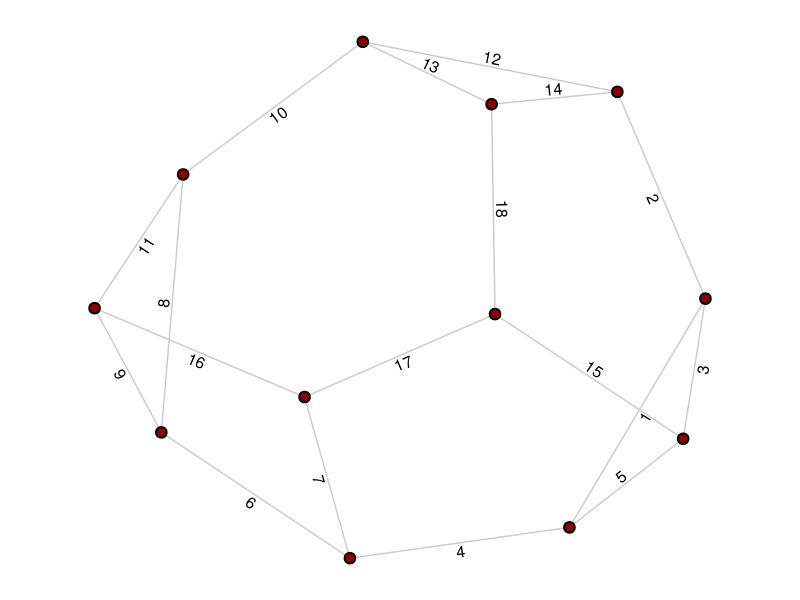

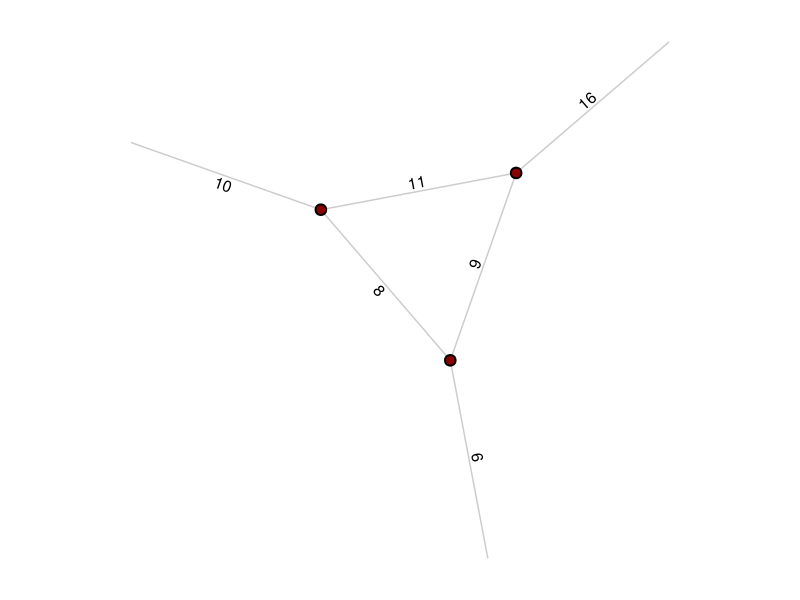

27-element Vector{Int64}:
 0
 0
 0
 0
 0
 1
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [38]:
# Implement a frucht graph TN, try to selected a cycle to transform into DMRG approachable tree


dimension = 3
G = Graphs.smallgraph(:frucht)
tn1 = fill_with_random(G, dimension, false, true)
locs_x =     [4, 4, -5, -2, 0, 0, 2, 0, -3, -1, -6, -4]
locs_y = -1*[-2, 1, -2, -1, 0, -2, 0, 3, 3, 1, 1, 0]
g, tensordict, edgesdict, fully_weighted_edge_list, edge_index_map = extract_graph_representation(tn1, false)

drawing1 = Makie.plot(tn1, node_color=[:darkred for i in 1:length(tensors(tn1))], labels=true, layout=Stress(), edge_color=:grey80)
display(drawing1)

example_cycle = [8, 9, 11]

function extract_partial_tn_loop(TN, cycle)
    index_cut = Symbol(cycle[1])
    tensors_in_loop = collect(Set([tensor for id in cycle for tensor in Tenet.select(TN, Symbol(id))])) #correct orderding of variable definitions
    current_tn = TensorNetwork(tensor for tensor in tensors_in_loop)
    drawing1 = Makie.plot(current_tn, node_color=[:darkred for i in 1:length(tensors(current_tn))], labels=true, layout=Stress(), edge_color=:grey80)
    display(drawing1)

    
end

extract_partial_tn_loop(tn1, example_cycle)
function compute_kronecker_product(vectors)

    """
    Helper function to compute the outer product for an array of vectors
    """

    num_vectors = length(vectors)
    # Check if there are at least two vectors for the tensor product
    @assert num_vectors >= 2
    # Initialize the result with the tensor product of the first two vectors
    result = kron(vectors[1], vectors[2])
    # Compute the tensor product with the remaining vectors
    for i in 3:num_vectors
        result = kron(result, vectors[i])
    end

    return result
end

vectors = [[1,0,0], [0,1,0], [0,0,1]]
result = compute_kronecker_product(vectors)
display(result)


